In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam
from keras.callbacks import  EarlyStopping
from keras.utils import to_categorical

In [ ]:
csv_path = '/content/drive/MyDrive/a-z/A_Z Handwritten Data.csv'

# Load CSV file into a DataFrame
data = pd.read_csv(csv_path)
# data.head()

In [ ]:
from keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the number of samples per class
samples_per_class = 2000

# Initialize lists to store the selected data
x_selected_train, y_selected_train = [], []
x_selected_test, y_selected_test = [], []

# Loop through each class
for class_label in range(10):  # MNIST has 10 classes (digits 0 to 9)
    # Select indices corresponding to the current class
    indices_train = np.where(y_train == class_label)[0][:samples_per_class]
    indices_test = np.where(y_test == class_label)[0][:samples_per_class]

    # Select data samples based on the indices
    x_selected_train.append(x_train[indices_train])
    y_selected_train.append(y_train[indices_train])
    x_selected_test.append(x_test[indices_test])
    y_selected_test.append(y_test[indices_test])

# Concatenate the selected data to create the final subsets
x2_train = np.concatenate(x_selected_train, axis=0)
y2_train = np.concatenate(y_selected_train, axis=0)
x2_test = np.concatenate(x_selected_test, axis=0)
y2_test = np.concatenate(y_selected_test, axis=0)

# Print the shape of the selected subsets
print("Shape of x2_train:", x2_train.shape)
print("Shape of y2_train:", y2_train.shape)
print("Shape of x2_test:", x2_test.shape)
print("Shape of y2_test:", y2_test.shape)


Shape of x2_train: (20000, 28, 28)
Shape of y2_train: (20000,)
Shape of x2_test: (10000, 28, 28)
Shape of y2_test: (10000,)


In [ ]:
train =[]
test =[]
for i in y2_train:
  train.append(i+26)
for i in y2_test:
  test.append(i+26)

In [ ]:
num_train = np.array(train)
num_test = np.array(test)

In [ ]:
# Assuming you have a list of labels where each label corresponds to a class
X = data.drop('0',axis = 1)
y = data['0']

# Initialize an empty dictionary to store counts for each class
class_counts = {}

# Iterate through the labels and count occurrences of each class
for label in y:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Print the counts for each class
for class_label, count in class_counts.items():
    print("Class '{}': {} data points".format(class_label, count))

Class '0': 13869 data points
Class '1': 8668 data points
Class '2': 23409 data points
Class '3': 10134 data points
Class '4': 11440 data points
Class '5': 1163 data points
Class '6': 5762 data points
Class '7': 7218 data points
Class '8': 1120 data points
Class '9': 8493 data points
Class '10': 5603 data points
Class '11': 11586 data points
Class '12': 12336 data points
Class '13': 19010 data points
Class '14': 57825 data points
Class '15': 19341 data points
Class '16': 5812 data points
Class '17': 11566 data points
Class '18': 48419 data points
Class '19': 22495 data points
Class '20': 29008 data points
Class '21': 4182 data points
Class '22': 10784 data points
Class '23': 6272 data points
Class '24': 10859 data points
Class '25': 6076 data points


In [ ]:
classes = y.unique()
new_data_list = []

for class_label in classes:
    class_subset = data[y == class_label]
    if len(class_subset) >= 2000:
        sampled_subset = class_subset.sample(n=2000, random_state=42)
    else:
        sampled_subset = class_subset
    new_data_list.append(sampled_subset)

# Combine all the sampled subsets into a single DataFrame
new_data = pd.concat(new_data_list, ignore_index=True)

In [ ]:
X = new_data.drop('0',axis = 1)
y = new_data['0']

# Initialize an empty dictionary to store counts for each class
class_counts = {}

# Iterate through the labels and count occurrences of each class
for label in y:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Print the counts for each class
for class_label, count in class_counts.items():
    print("Class '{}': {} data points".format(class_label, count))

Class '0': 2000 data points
Class '1': 2000 data points
Class '2': 2000 data points
Class '3': 2000 data points
Class '4': 2000 data points
Class '5': 1163 data points
Class '6': 2000 data points
Class '7': 2000 data points
Class '8': 1120 data points
Class '9': 2000 data points
Class '10': 2000 data points
Class '11': 2000 data points
Class '12': 2000 data points
Class '13': 2000 data points
Class '14': 2000 data points
Class '15': 2000 data points
Class '16': 2000 data points
Class '17': 2000 data points
Class '18': 2000 data points
Class '19': 2000 data points
Class '20': 2000 data points
Class '21': 2000 data points
Class '22': 2000 data points
Class '23': 2000 data points
Class '24': 2000 data points
Class '25': 2000 data points


In [ ]:
x2_train = x2_train.reshape(x2_train.shape[0], 28, 28, 1)
x2_test = x2_test.reshape(x2_test.shape[0], 28, 28, 1)
print("Shape of x2_train:", x2_train.shape)
print("Shape of y2_train:", num_train.shape)
print("Shape of x2_test:", x2_test.shape)
print("Shape of y2_test:", num_test.shape)

Shape of x2_train: (20000, 28, 28, 1)
Shape of y2_train: (20000,)
Shape of x2_test: (10000, 28, 28, 1)
Shape of y2_test: (10000,)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28,1))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28,1))
print("Shape of x_train:", train_x.shape)
print("Shape of x_test:", train_y.shape)
print("Shape of y_train:", test_x.shape)
print("Shape of y_test:", test_y.shape)

Shape of x_train: (35198, 28, 28, 1)
Shape of x_test: (35198,)
Shape of y_train: (15085, 28, 28, 1)
Shape of y_test: (15085,)


In [ ]:
# Ensure that the shapes are compatible for concatenation
assert train_x.shape[1:] == x2_train.shape[1:]
assert train_y.shape[1:] == num_train.shape[1:]
assert test_x.shape[1:] == x2_test.shape[1:]
assert test_y.shape[1:] == num_test.shape[1:]
# Combine the datasets
combined_x_train = np.concatenate([train_x, x2_train], axis=0)
combined_y_train = np.concatenate([train_y, num_train], axis=0)
combined_x_test = np.concatenate([test_x, x2_test], axis=0)
combined_y_test = np.concatenate([test_y, num_test], axis=0)

# Print the new shapes
print("Shape of combined x_train:", combined_x_train.shape)
print("Shape of combined y_train:", combined_y_train.shape)
print("Shape of combined x_test:", combined_x_test.shape)
print("Shape of combined y_test:", combined_y_test.shape)

Shape of combined x_train: (55198, 28, 28, 1)
Shape of combined y_train: (55198,)
Shape of combined x_test: (25085, 28, 28, 1)
Shape of combined y_test: (25085,)


In [ ]:
# One Hot Encoding
train_yOHE = to_categorical(combined_y_train, num_classes = 36, dtype='int')
print("The new shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(combined_y_test, num_classes = 36, dtype='int')
print("The new shape of test labels: ", test_yOHE.shape)

The new shape of train labels:  (55198, 36)
The new shape of test labels:  (25085, 36)


In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
train_x,test_x=prep_pixels(combined_x_train,combined_x_test)

In [ ]:
from keras.layers import AveragePooling2D

def model(input_shape, num_classes):
    model2 = Sequential()

    # Layer 1: Convolutional + Pooling
    model2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model2.add(AveragePooling2D(pool_size=(2, 2)))

    # Layer 2: Convolutional + Pooling
    model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model2.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten before fully connected layers
    model2.add(Flatten())

    # Layer 3: Fully Connected
    model2.add(Dense(units=120, activation='relu'))

    # Layer 4: Fully Connected
    model2.add(Dense(units=84, activation='relu'))

    # Output layer
    model2.add(Dense(units=36, activation='softmax'))

    return model2

# Assuming input images are 28x28 pixels (adjust accordingly)
input_shape = (28, 28, 1)

# Number of classes (adjust based on your problem)
num_classes = 36

# Build LeNet-5 model
model2 = model(input_shape, num_classes)

# Display model summary
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_6 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_7 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [ ]:
from keras.losses import categorical_crossentropy
model2.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5)
history = model2.fit(train_x, train_yOHE, epochs=20, validation_data = (test_x,test_yOHE), callbacks=[early_stopping])

Epoch 1/20
1725/1725 [==============================] - 12s 6ms/step - loss: 0.7437 - accuracy: 0.7846 - val_loss: 0.3843 - val_accuracy: 0.8781
Epoch 2/20
1725/1725 [==============================] - 10s 6ms/step - loss: 0.2913 - accuracy: 0.9079 - val_loss: 0.3004 - val_accuracy: 0.9012
Epoch 3/20
1725/1725 [==============================] - 11s 6ms/step - loss: 0.2195 - accuracy: 0.9284 - val_loss: 0.2058 - val_accuracy: 0.9349
Epoch 4/20
1725/1725 [==============================] - 11s 6ms/step - loss: 0.1813 - accuracy: 0.9398 - val_loss: 0.1868 - val_accuracy: 0.9405
Epoch 5/20
1725/1725 [==============================] - 10s 6ms/step - loss: 0.1557 - accuracy: 0.9470 - val_loss: 0.1730 - val_accuracy: 0.9428
Epoch 6/20
1725/1725 [==============================] - 10s 6ms/step - loss: 0.1377 - accuracy: 0.9530 - val_loss: 0.1806 - val_accuracy: 0.9400
Epoch 7/20
1725/1725 [==============================] - 11s 6ms/step - loss: 0.1208 - accuracy: 0.9578 - val_loss: 0.1743 - val_ac

In [ ]:
# Save the model
model2.save('/content/drive/MyDrive/model/Emodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report
predictions = model2.predict(test_x)
# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_yOHE, axis=1)

# Calculate confusion matrix
conf_matrix = classification_report(true_classes, predicted_classes)
print("conf_matrix :")
print(conf_matrix)

784/784 [==============================] - 4s 5ms/step
conf_matrix :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       617
           1       0.97      0.95      0.96       575
           2       0.98      0.96      0.97       582
           3       0.91      0.96      0.94       607
           4       0.99      0.96      0.97       582
           5       0.99      0.99      0.99       362
           6       0.95      0.98      0.97       650
           7       0.97      0.95      0.96       623
           8       0.99      0.97      0.98       356
           9       0.88      0.98      0.93       598
          10       0.95      0.96      0.96       613
          11       0.96      0.99      0.98       638
          12       0.99      0.95      0.97       588
          13       0.92      0.98      0.95       586
          14       0.73      0.84      0.78       598
          15       0.98      0.97      0.97       592
          16

In [ ]:
import cv2
def preprocess_image(image):
    if len(image.shape) == 3:  # Check if image is not grayscale
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = image

    # Apply adaptive thresholding for character extraction
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and improve character shape
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    return opening

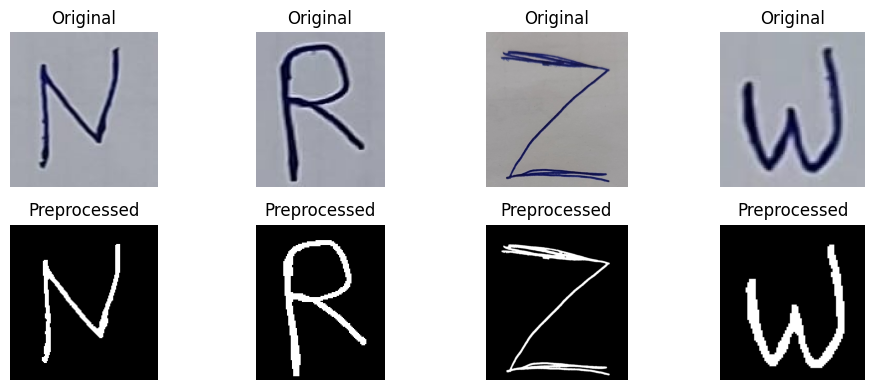

In [ ]:
images= []
pro_images =[]
images.append(cv2.imread('/content/drive/MyDrive/n.jpg'))
images.append(cv2.imread('/content/drive/MyDrive/r.jpg'))
images.append(cv2.imread('/content/drive/MyDrive/z.jpg'))
images.append(cv2.imread('/content/drive/MyDrive/w.jpg'))

for i in images:
  pro_images.append(preprocess_image(i))
# Display the original images
plt.figure(figsize=(10, 4))
for i, img in enumerate(images):
    plt.subplot(2, len(images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

# Display the preprocessed images
for i, img in enumerate(pro_images):
    plt.subplot(2, len(pro_images), len(pro_images) + i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('Preprocessed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

def resize_images(image, bold_factor=2):
    img = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)

    # Enhance contrast and brightness
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 10  # Brightness control (0-100)
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

    # Apply Gaussian blur to remove blurriness
    img_blur = cv2.GaussianBlur(img, (3, 3), 0)

    # Apply sharpening using unsharp mask
    sharpened = cv2.addWeighted(img, 1.5, img_blur, -0.5, 0)

    # Create a bold effect
    bold_image = np.copy(sharpened)
    for _ in range(bold_factor):
        bold_image = cv2.add(bold_image, sharpened)

    img_array = np.array(bold_image, dtype=np.float32)
    img_array = img_array.reshape((28, 28, 1))
    img_array = img_array / 255.0

    return img_array

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


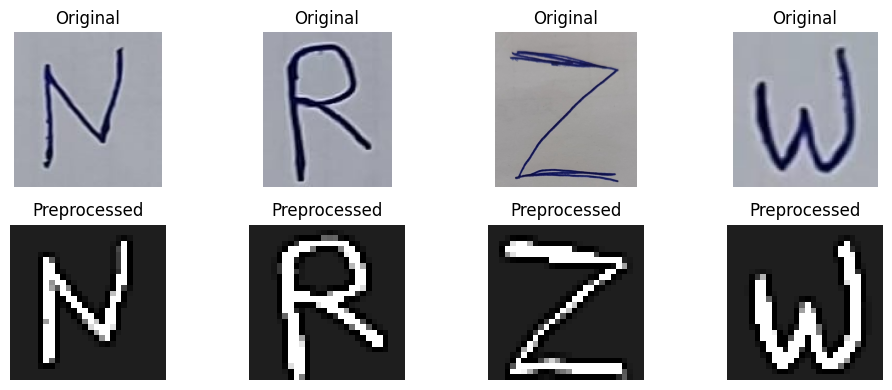

In [ ]:
resized_images = []
higher_bold_factor = 2
for i in pro_images:
    x= resize_images(i, higher_bold_factor)
    resized_images.append(x)
    print(x.shape)

plt.figure(figsize=(10, 4))
for i, img in enumerate(images):
    plt.subplot(2, len(images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

# Display the preprocessed images
for i, img in enumerate(resized_images):
    plt.subplot(2, len(resized_images), len(resized_images) + i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('Preprocessed')
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 68ms/step


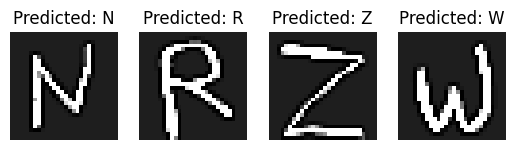

In [ ]:
from keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/model/Emodel.h5')
word_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1',
    28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'
}
predicted = []
for i, img in enumerate(resized_images):
    predictions = saved_model.predict(np.array([img]))

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Convert the predicted class index to its corresponding label using the word_dict
    predicted_class_label = word_dict.get(predicted_class_index, 'Unknown')
    predicted.append(predicted_class_label)

    # Display the image and its predicted label
    plt.subplot(1, len(resized_images), i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted_class_label}')
    plt.axis('off')

plt.show()

In [ ]:
!pip install fastapi uvicorn numpy pillow opencv-python-headless tensorflow pytesseract nest_asyncio pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install fastapi uvicorn

In [ ]:
!pip install fastapi uvicorn pydantic pillow

In [ ]:
!pip install pyngrok

In [ ]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,711 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import pytesseract
from pytesseract import Output
def line_segmentation(img, padding=5):
    # Compute the horizontal histogram
    horizontal_histogram = np.sum(img, axis=1)

    # Create an array of row indices
    rows = np.arange(img.shape[0])

    # Plot the horizontal histogram
    plt.barh(rows, horizontal_histogram)
    plt.xlabel('Sum')
    plt.ylabel('Row')
    plt.title('Horizontal Histogram')
    plt.show()

    # Thresholding
    threshold = 0.001 * np.max(horizontal_histogram)
    binary_histogram = np.where(horizontal_histogram > threshold, 1, 0)

    # Line Segmentation
    line_starts = np.where(np.diff(binary_histogram) > 0)[0] + 1
    line_ends = np.where(np.diff(binary_histogram) < 0)[0] + 1

    # Segment each line and store it in a list
    lines = []
    for start, end in zip(line_starts, line_ends):
        # Apply padding
        start = max(start - padding, 0)
        end = min(end + padding, img.shape[0])
        line_image = img[start:end, :]  # Extract line region with padding
        lines.append(line_image)

    return lines

def handwriting_word_segmentation(image, padding=15):
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    word_images = []

    for i, word_text in enumerate(data['text']):
        # Filter out non-word regions
        if len(word_text.strip()) > 0:
            x = data['left'][i]
            y = data['top'][i]
            width = data['width'][i]
            height = data['height'][i]

            # Expand the bounding box
            x -= padding
            y -= padding
            width += 3 * padding
            height += 3 * padding

            # Ensure the bounding box is within the image boundaries
            x = max(0, x)
            y = max(0, y)
            width = min(width, image.shape[1] - x)
            height = min(height, image.shape[0] - y)

            # Extract the word region from the image
            word_image = image[y:y+height, x:x+width]

            # Display the word image
            cv2_imshow(word_image)

            # Append the word image to the list
            word_images.append(word_image)

    return word_images



def character_segmentation(image, padding=5):
    structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    eroded_image = cv2.erode(image, structuring_element, iterations=1)

    # Compute the vertical histogram
    hist = np.sum(eroded_image, axis=0)
    # Set a threshold to identify gaps between characters
    threshold = 1  # Adjust threshold as needed

    # Find positions where histogram values are below the threshold
    gap_indices = np.where(hist < threshold)[0]

    # Segment characters based on gaps using the original image
    char_images = []
    prev_idx = 0
    for idx in gap_indices:
        if idx - prev_idx > 1:  # Check if there's a gap
            # Extract the character region from the original image
            char = image[:, max(prev_idx-padding, 0):min(idx+padding, image.shape[1])]
            # Add 1 pixel black border around the character
            char = cv2.copyMakeBorder(char, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0)
            # Check if the sum of pixel values exceeds a minimum threshold
            if np.sum(char) > 100:  # Adjust threshold as needed
                # Resize character to a fixed size of 28x28 pixels
                char = cv2.resize(char, (28, 28))
                char_images.append(char)
        prev_idx = idx

    return char_images


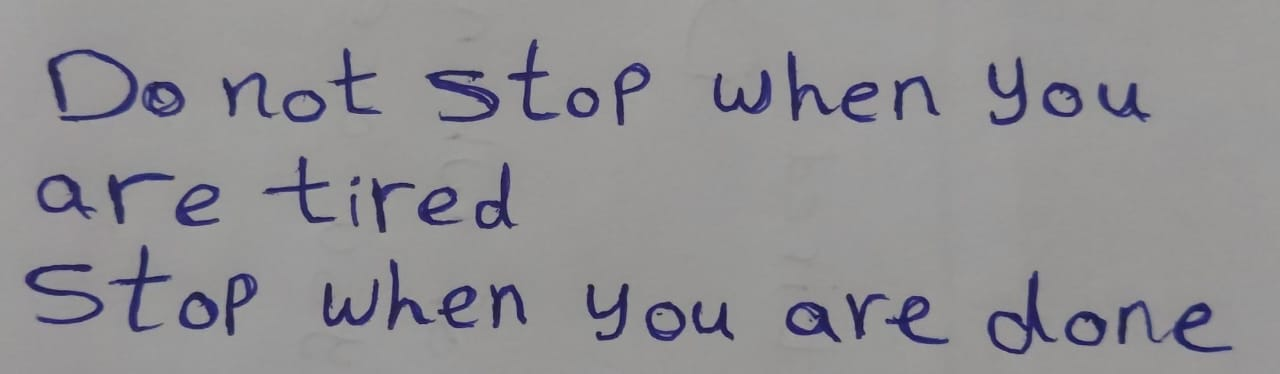

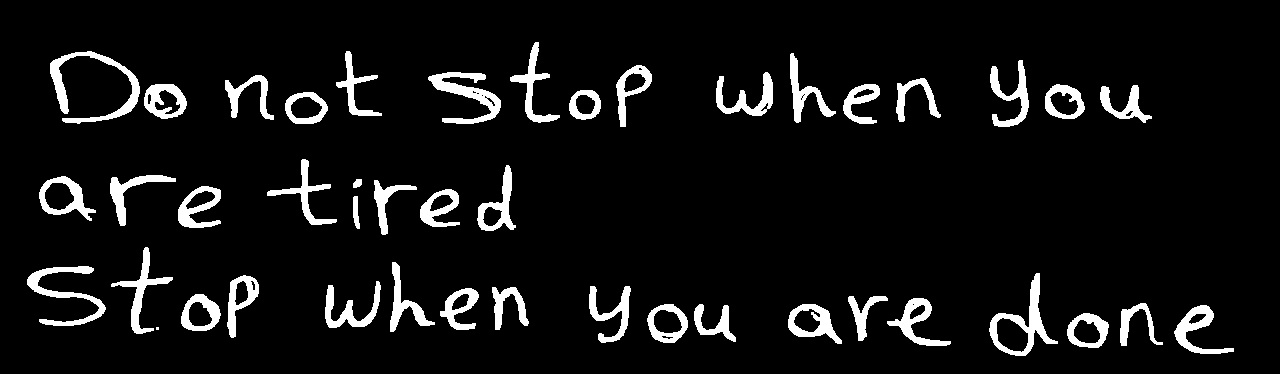

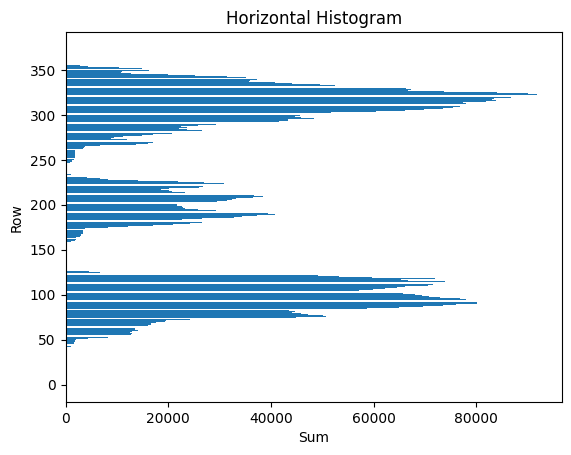

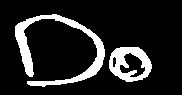

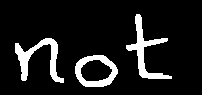

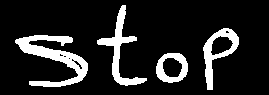

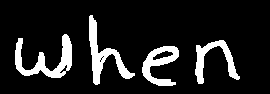

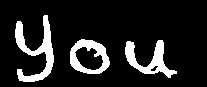

char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


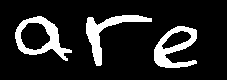

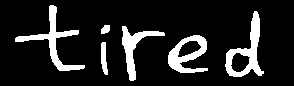

char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


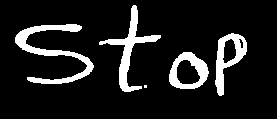

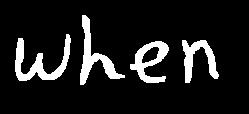

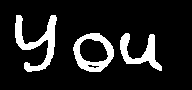

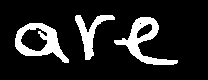

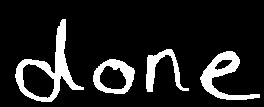

char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


char shape (28, 28)
resized_char shape (28, 28, 1)


In [ ]:

from google.colab.patches import cv2_imshow
# saved_model = load_model('/content/drive/MyDrive/model/Emodel.h5')
# word_dict = {
#     0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
#     10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
#     19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1',
#     28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'
# }
def main_function (image):
  cv2_imshow(image)
  preprocessed_image = preprocess_image(image)
  cv2_imshow(preprocessed_image)
  lines = line_segmentation(preprocessed_image)
  for line in lines:
     words = handwriting_word_segmentation(line)
     line=[]
     for word in words:
      chars = character_segmentation(word)
      word= []
      for char in chars:
       cv2_imshow(char)
       print("char shape" ,char.shape)
       resized_char = resize_images(char,3)
       print("resized_char shape" ,resized_char.shape)

image_path = '/content/drive/MyDrive/final.jpg'
image = cv2.imread(image_path)
main_function(image)

In [ ]:
import io
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
from pyngrok import ngrok
import nest_asyncio
import uvicorn
import pytesseract
from pytesseract import Output

# Load your model here
model = tf.keras.models.load_model('/content/drive/MyDrive/model/Emodel.h5')

word_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1',
    28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'
}

app = FastAPI()

def read_imagefile(file) -> Image.Image:
    image = Image.open(io.BytesIO(file))
    return image

def preprocess_image(image):
    image = np.array(image)
    if len(image.shape) == 3:  # Check if image is not grayscale
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = image

    # Apply adaptive thresholding for character extraction
    _, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and improve character shape
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    return opening

def line_segmentation(img, padding=5):
    # Compute the horizontal histogram
    horizontal_histogram = np.sum(img, axis=1)

    # Create an array of row indices
    rows = np.arange(img.shape[0])
    # Thresholding
    threshold = 0.001 * np.max(horizontal_histogram)
    binary_histogram = np.where(horizontal_histogram > threshold, 1, 0)

    # Line Segmentation
    line_starts = np.where(np.diff(binary_histogram) > 0)[0] + 1
    line_ends = np.where(np.diff(binary_histogram) < 0)[0] + 1

    # Segment each line and store it in a list
    lines = []
    for start, end in zip(line_starts, line_ends):
        # Apply padding
        start = max(start - padding, 0)
        end = min(end + padding, img.shape[0])
        line_image = img[start:end, :]  # Extract line region with padding
        lines.append(line_image)

    return lines

def handwriting_word_segmentation(image, padding=10):
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    word_images = []

    for i, word_text in enumerate(data['text']):
        # Filter out non-word regions
        if len(word_text.strip()) > 0:
            x = data['left'][i]
            y = data['top'][i]
            width = data['width'][i]
            height = data['height'][i]

            # Expand the bounding box
            x -= padding
            y -= padding
            width += 2 * padding
            height += 2 * padding

            # Ensure the bounding box is within the image boundaries
            x = max(0, x)
            y = max(0, y)
            width = min(width, image.shape[1] - x)
            height = min(height, image.shape[0] - y)

            # Extract the word region from the image
            word_image = image[y:y+height, x:x+width]

            word_images.append(word_image)

    return word_images

def character_segmentation(image, padding=5):
    structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    eroded_image = cv2.erode(image, structuring_element, iterations=1)

    # Compute the vertical histogram
    hist = np.sum(eroded_image, axis=0)
    # Set a threshold to identify gaps between characters
    threshold = 1  # Adjust threshold as needed

    # Find positions where histogram values are below the threshold
    gap_indices = np.where(hist < threshold)[0]

    # Segment characters based on gaps using the original image
    char_images = []
    prev_idx = 0
    for idx in gap_indices:
        if idx - prev_idx > 1:  # Check if there's a gap
            # Extract the character region from the original image
            char = image[:, max(prev_idx-padding, 0):min(idx+padding, image.shape[1])]
            # Check if the sum of pixel values exceeds a minimum threshold
            if np.sum(char) > 100:  # Adjust threshold as needed
                # Resize character to a fixed size of 28x28 pixels
                char = cv2.resize(char, (28, 28))
                char_images.append(char)
        prev_idx = idx

    return char_images

def main_function(image):
    preprocessed_image = preprocess_image(image)
    lines = line_segmentation(preprocessed_image)
    result = []
    for line in lines:
        words = handwriting_word_segmentation(line)
        line_result = []
        for word in words:
            chars = character_segmentation(word)
            word_result = []
            for char in chars:
                predictions = model.predict(np.array([char]))
                predicted_class_index = np.argmax(predictions[0])
                predicted_class_label = word_dict.get(predicted_class_index, 'Unknown')
                word_result.append(predicted_class_label)
            result_word = ''.join(word_result)
            line_result.append(result_word)
        result_line = ' '.join(line_result)
        result.append(result_line)

    return result

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    image = read_imagefile(contents)
    result = main_function(image)
    return JSONResponse(content={"result": result})


nest_asyncio.apply()

# Add your ngrok authtoken here
ngrok.set_auth_token("2iJTO8NSsnG0gWB2mULk0FLceGc_4Ckok81bJUNQXHVy83fHf")

# Start ngrok tunnel without specifying a custom domain
public_url = ngrok.connect(8000, domain="superb-helpful-herring.ngrok-free.app")
print(f"Public URL: {public_url}")

def run_app():
    uvicorn.run(app, host="0.0.0.0", port=8000)

if __name__ == "__main__":
    run_app()


INFO:     Started server process [1153]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://superb-helpful-herring.ngrok-free.app" -> "http://localhost:8000"
1/1 [==============================] - 0s 18ms/step
INFO:     102.59.216.3:0 - "POST /predict/ HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/http/httptools_impl.py", line 399, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/middleware/proxy_headers.py", line 70, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 164, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.10/dis

1/1 [==============================] - 0s 17ms/step
INFO:     102.59.216.3:0 - "POST /predict/ HTTP/1.1" 200 OK
1/1 [==============================] - 0s 22ms/step
INFO:     102.59.216.3:0 - "POST /predict/ HTTP/1.1" 200 OK
